In [156]:
import pandas as pd
import numpy as np
import math

danmu_count_10s = np.zeros((16,145))

for i in range(16):
    path = r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\danmu\112522\112522_"+ str(i+1) + ".csv"
    f = pd.read_csv(path, low_memory=False)
    f['time'] = f['time']/100
    
    for t in range(math.ceil(f['time'].max())):
        danmu_count_10s[i,t] = f[(f['time'] >= t) & (f['time'] < t+1 )]['time'].count()

In [163]:
danmu_count_10s[6]

array([58., 29., 46., 26., 13.,  6.,  4.,  6.,  6.,  5., 30., 17., 20.,
       18., 28., 39., 64., 30., 11., 20., 17., 21., 18., 74., 32.,  9.,
       21., 12., 11., 13., 12.,  5.,  5., 12., 10., 11., 11., 14., 17.,
        5.,  6., 10., 12., 12., 12.,  9., 19.,  7., 10.,  8., 10., 20.,
       14., 12., 15., 37., 16.,  9.,  9.,  6.,  5., 11., 16., 28., 65.,
       22., 21., 17., 10., 27., 21., 38., 30., 31., 14., 14., 26., 19.,
       14., 30., 33., 51., 29., 24., 21., 30., 13., 21.,  8., 11., 11.,
       13., 15.,  3., 14., 17., 20., 18., 38., 17., 12.,  8., 11., 20.,
        6., 21., 13., 38., 24., 16., 30., 15., 18., 38., 18., 35., 48.,
       36., 20., 29., 35., 50., 19., 33., 11., 26., 26., 44., 33., 23.,
       22., 32., 80., 38., 23., 21., 10., 19., 14., 10., 12.,  8., 19.,
       11.,  1.])

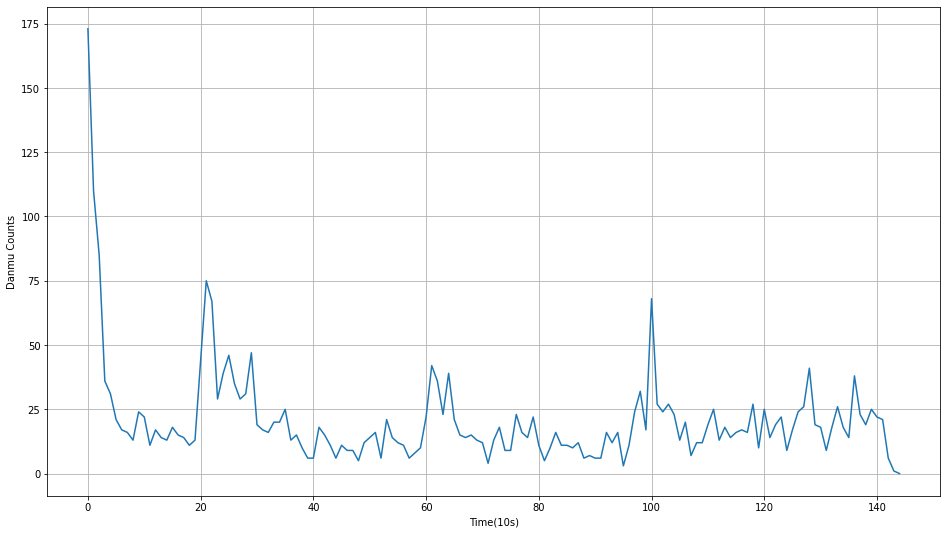

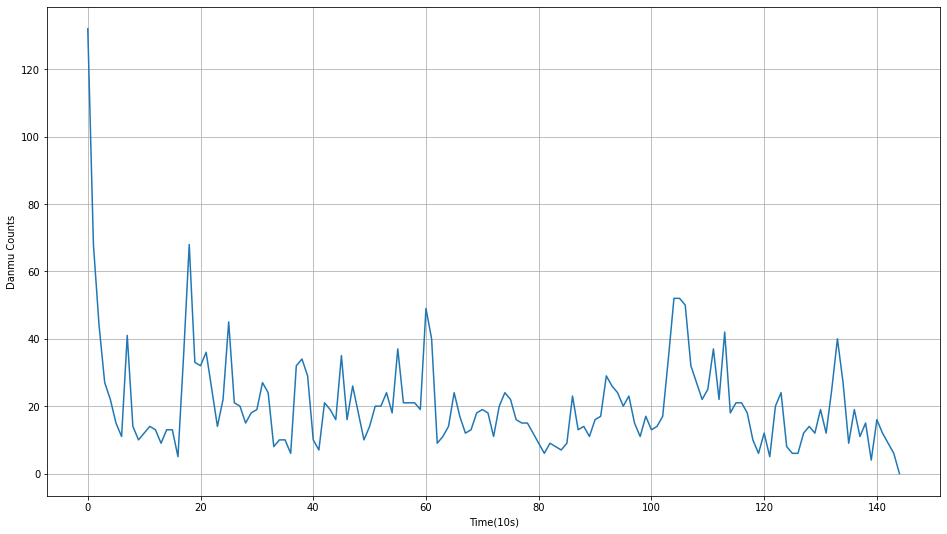

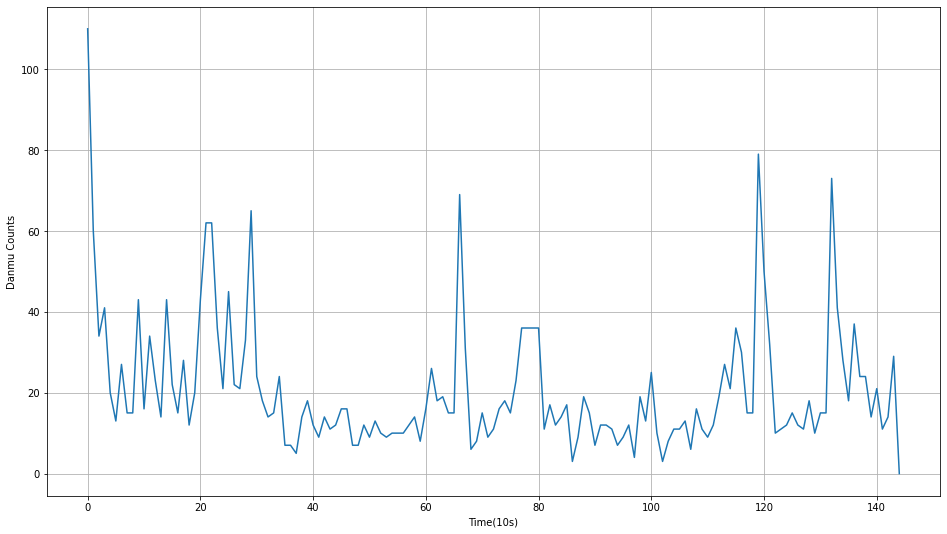

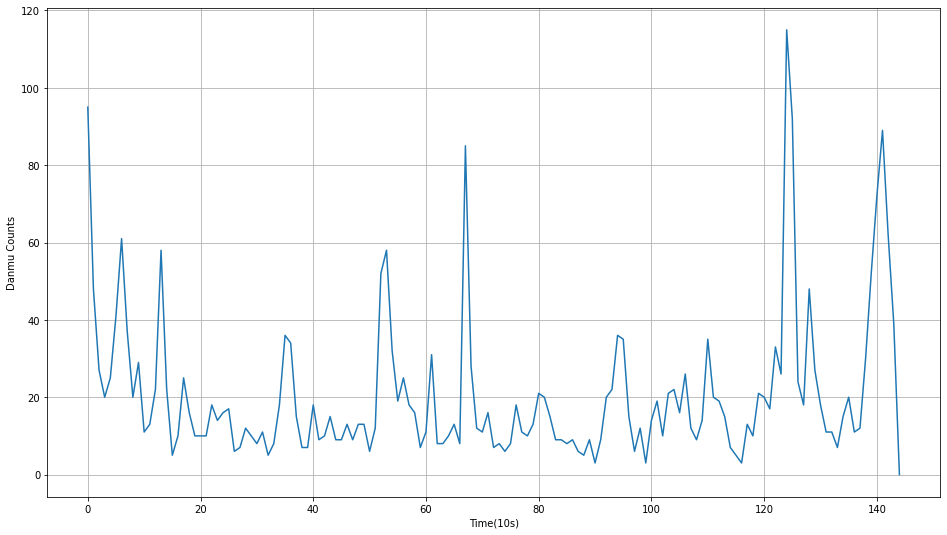

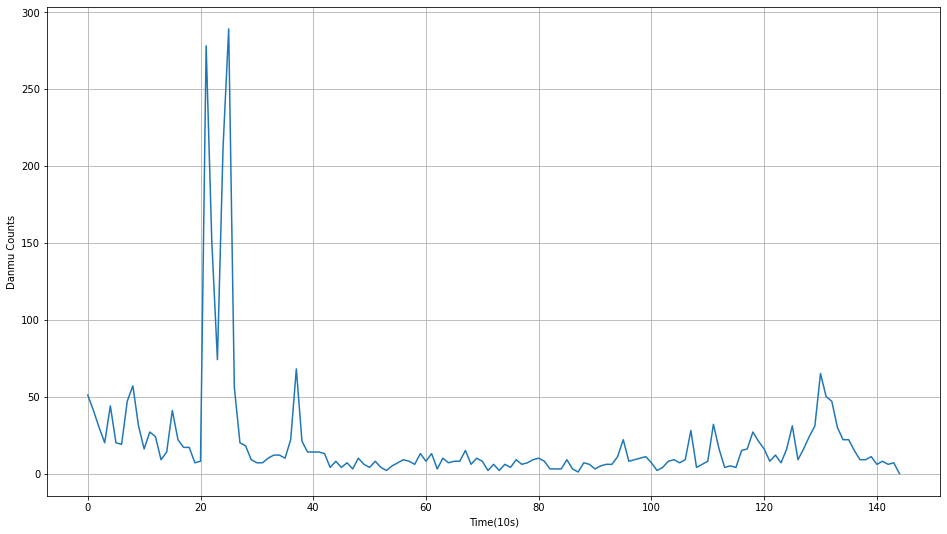

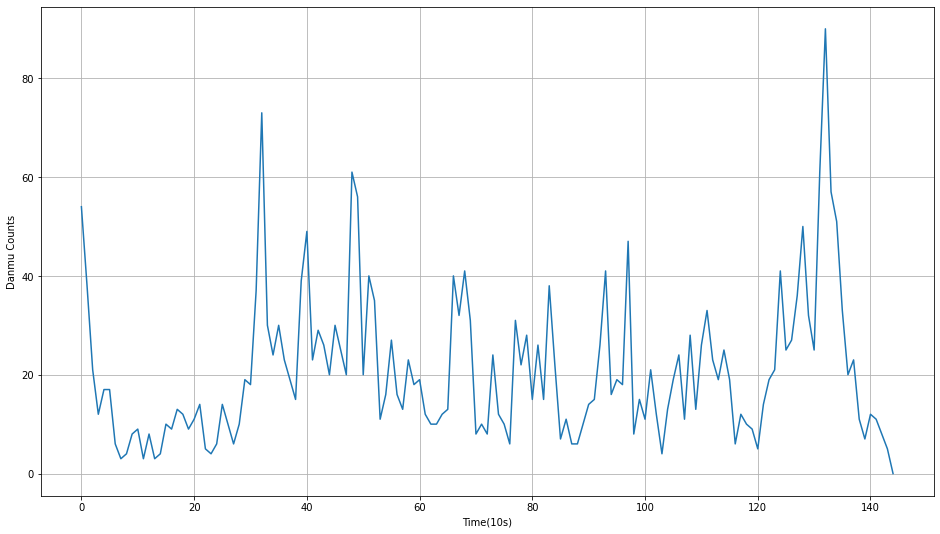

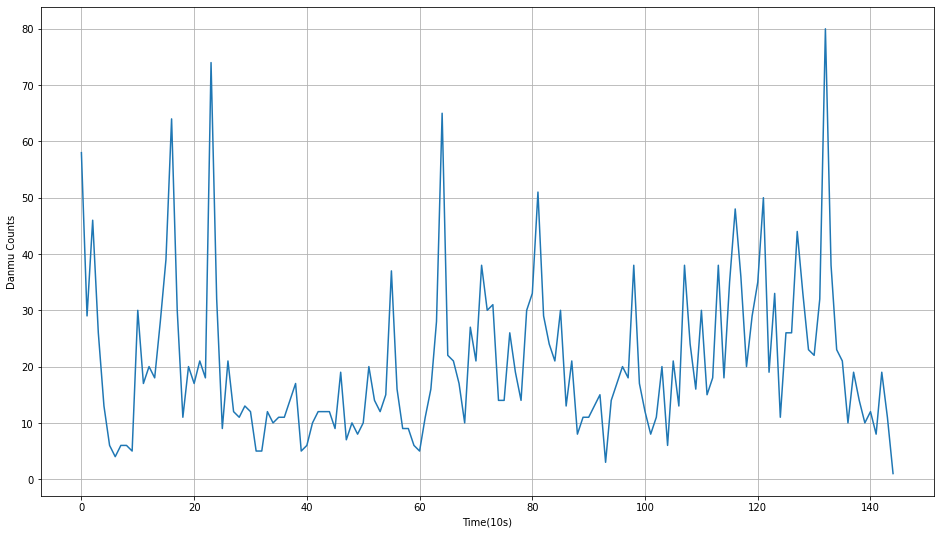

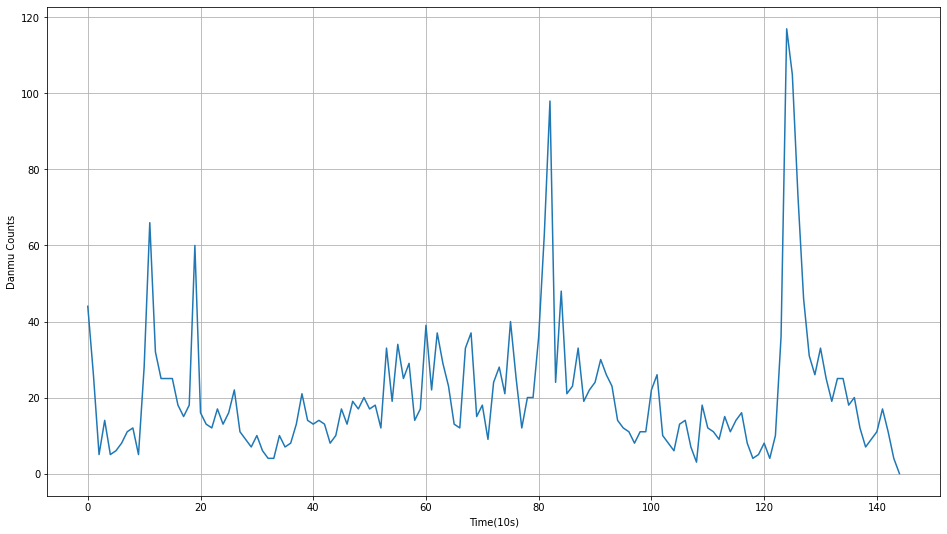

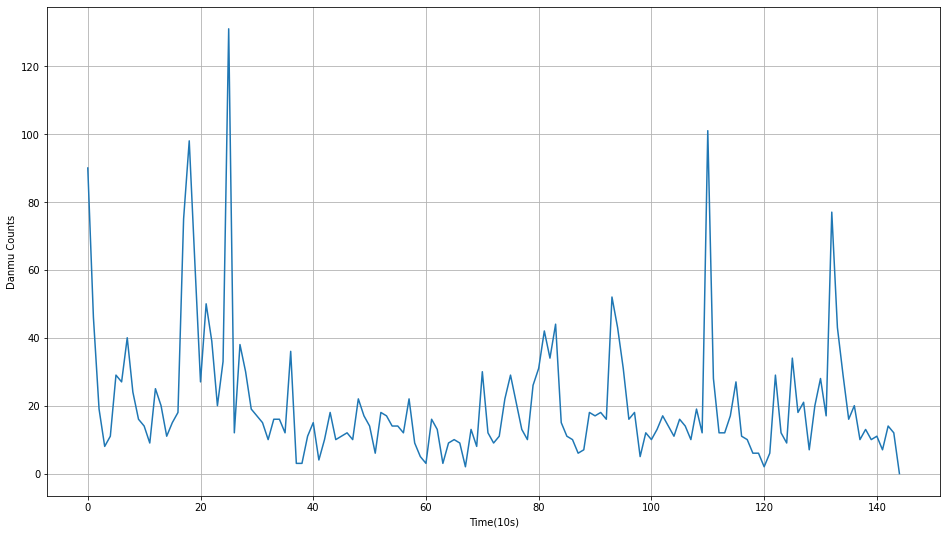

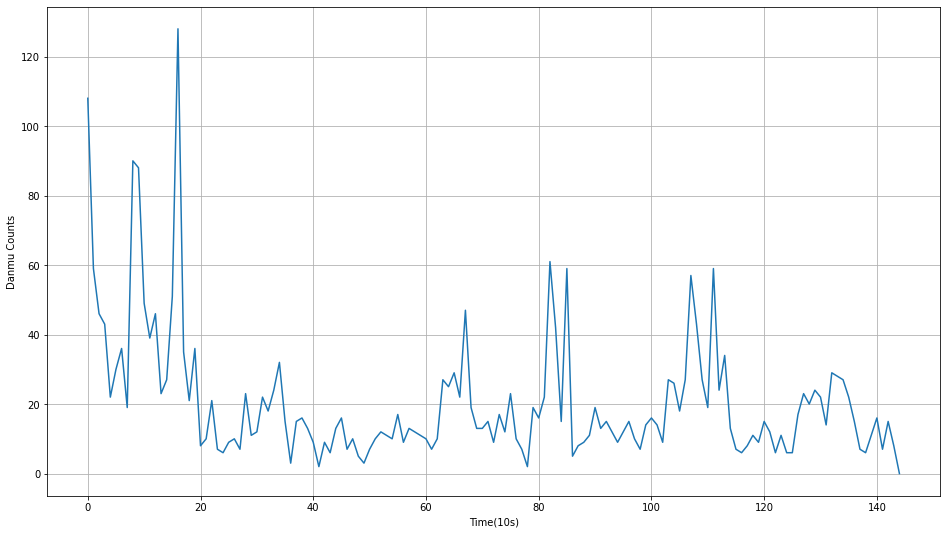

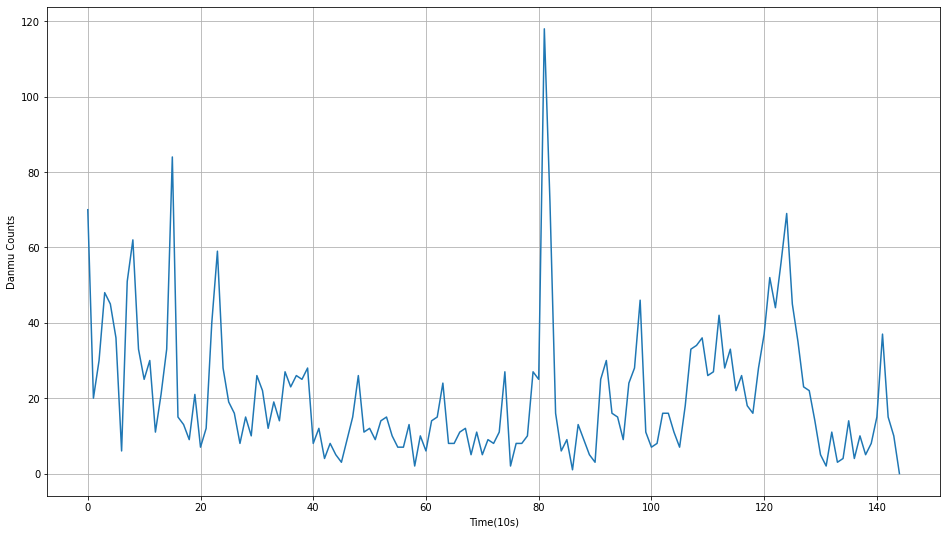

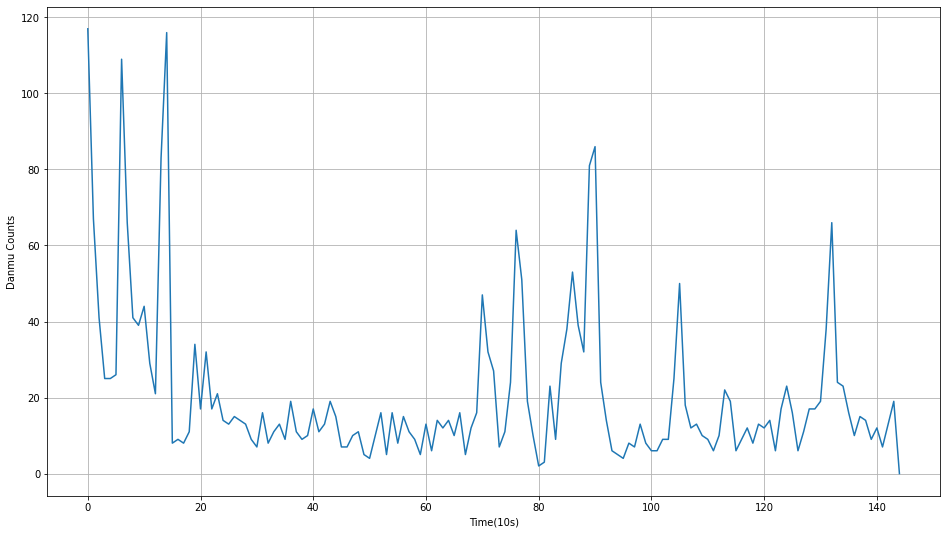

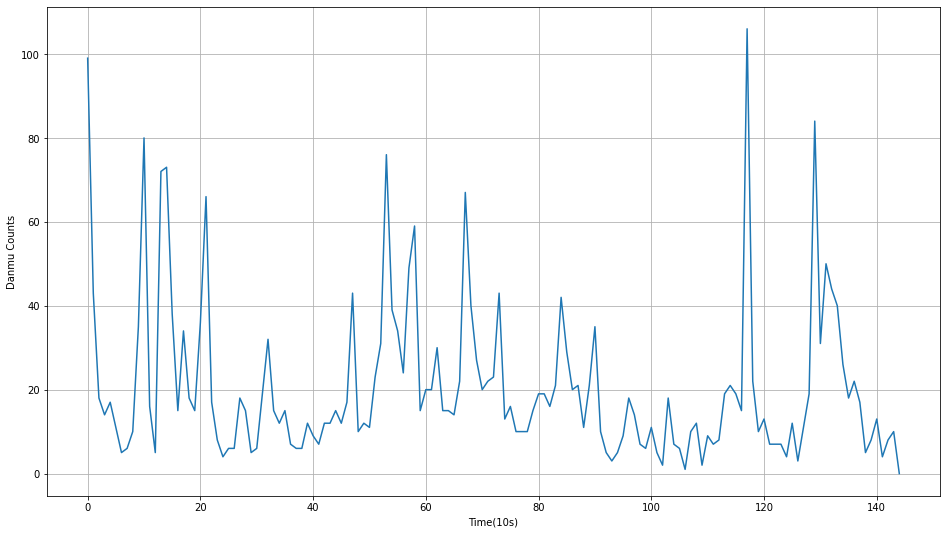

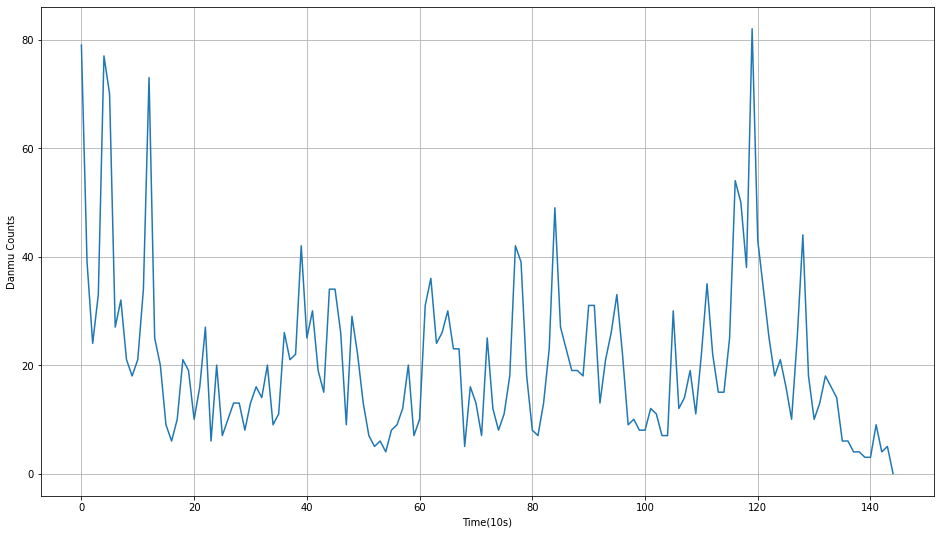

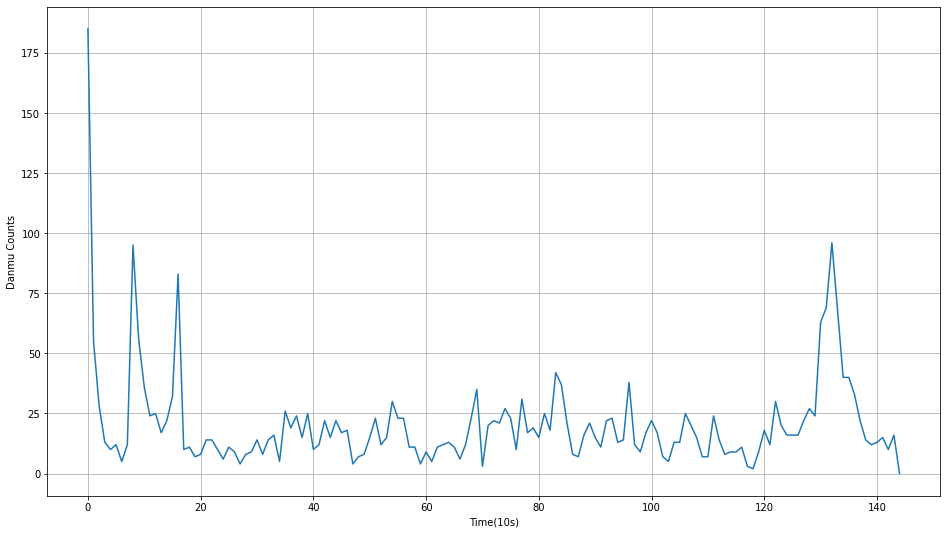

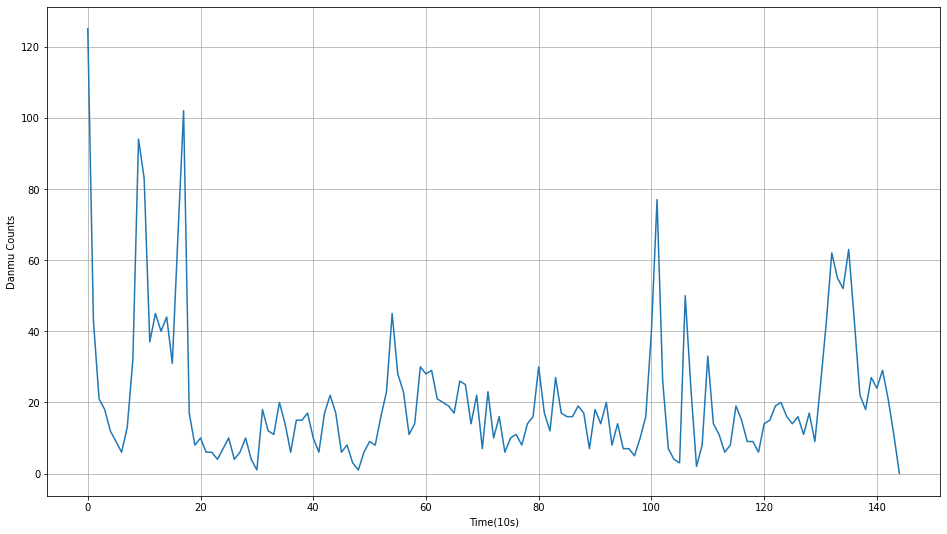

In [158]:
import matplotlib.pyplot as plt

for i in range(16):
    # plt.subplot(4,4,i+1)
    plt.figure(figsize=(16,9))
    plt.xlabel('Time(10s)')
    plt.ylabel('Danmu Counts')
    plt.grid(True)
    plt.plot(danmu_count_10s[i])
    plt.savefig(r"C:\Users\xinxi\Desktop\課程\社群媒體安全\project\damun_analyze-main\Output\112522_" +str(i+1)+".png", dpi=300)
# plt.show()

In [160]:
danmu_count_10s[:,144]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [161]:
result = np.zeros((16, 5)) # max, min ,mean, std, sum
for i in range(16):
    result[i,0]=danmu_count_10s[i].max()
    result[i,1]=danmu_count_10s[i].min()
    result[i,2]=danmu_count_10s[i].mean()
    result[i,3]=danmu_count_10s[i].std()
    result[i,4]=danmu_count_10s[i].sum()

In [162]:
result[:,4]

array([3001., 3001., 3001., 3001., 3001., 3001., 3001., 3001., 3001.,
       3001., 3001., 3001., 3001., 3001., 2965., 3001.])